# drawing raw points in gridded Coordinate plane with circle between two point in color 1&2

In [1]:
import matplotlib.pyplot as plt

In [2]:
#saving the data in Point_Data file to data
data = []
file_in = open('./data_point_with_delta.txt', 'r')
for y in file_in.read().split(' '):
    data.append(float(y))
file_in.close()

In [3]:
side_of_square=data[0]#side of squar that make grid view
n_color=int(data[1])#number of all color
points_x=[]#x cordiate of points
points_y=[]#y cordinate of points
points_color=[]#color of points
#saveing information of points to lists
for i in range(2,len(data),3):
    points_x.append(data[i])
    points_y.append(data[i+1])
    points_color.append(data[i+2])

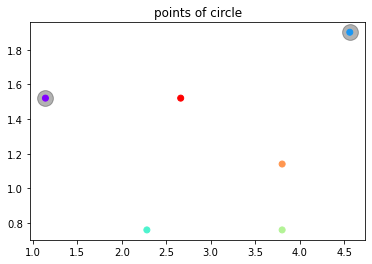

In [4]:
##points of circle
#two point that make circle
plt.scatter(points_x[0],points_y[0],color='black',s=250,alpha=0.3)
plt.scatter(points_x[1],points_y[1],color='black',s=250,alpha=0.3)
#other points
plt.scatter(points_x[:n_color],points_y[:n_color],c=points_color[:n_color],cmap='rainbow')
plt.title('points of circle')
plt.show()

In [5]:
#find center and radiuce of circle from two point
center_x=(points_x[0]+points_x[1])/2
center_y=(points_y[0]+points_y[1])/2
r=((points_x[0]-points_x[1])**2+(points_y[0]-points_y[1])**2)**0.5
r/=2

In [6]:
min_p=(min(points_x),min(points_y))
max_p=(max(points_x),max(points_y))

In [7]:
#draw grid view
def draw_line(ax,minn,maxx):
    #x_part
    start_x=minn[0]-(20*side_of_square)
    end_x=maxx[0]+(20*side_of_square)
    y=minn[1]-(20*side_of_square)
    while y<=maxx[1]+(20*side_of_square):
        ax.plot([start_x,end_x],[y,y],'c-.', linewidth=1, markersize=1)
        y+=side_of_square
    start_y=minn[1]-(20*side_of_square)
    end_y=maxx[1]+(20*side_of_square)
    x=minn[0]-(20*side_of_square)
    while x<maxx[1]+(20*side_of_square):
        ax.plot([x,x],[start_y,end_y],'c-.', linewidth=1, markersize=1)
        x+=side_of_square
    

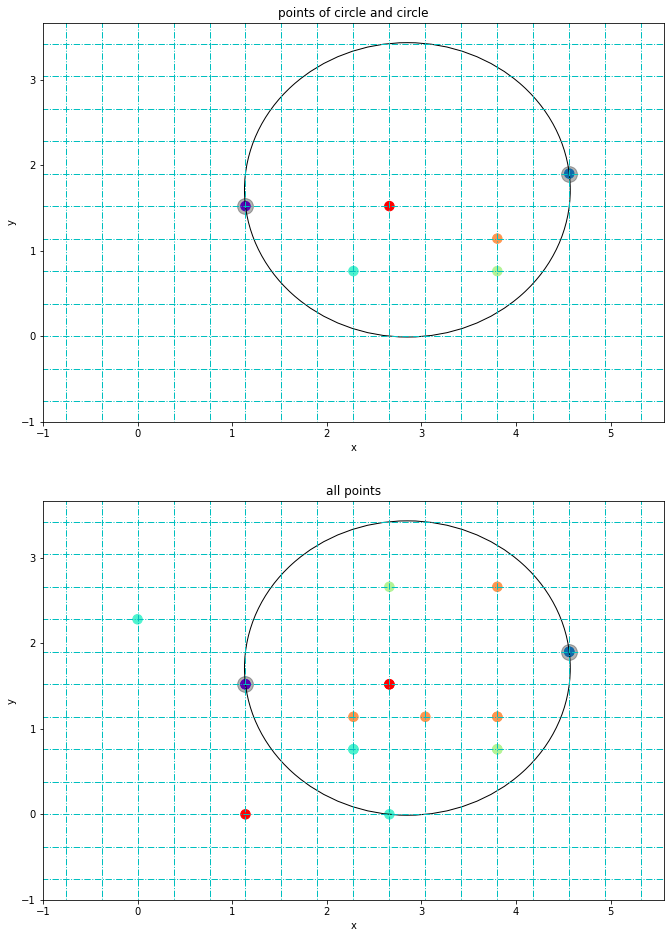

In [8]:
max_size=max((max_p[0]-min_p[0]+1)*2,(max_p[1]-min_p[1]+1)*2)#find max size of figure
fig, ax = plt.subplots(2,figsize=(max_size,max_size+5))#define figure

circle=plt.Circle((center_x, center_y),r,fill=False)#for first figure
circle1=plt.Circle((center_x, center_y),r,fill=False)#for second figure

#just for point in/on circle
draw_line(ax[0],min_p,max_p)
ax[0].scatter(points_x[:n_color],points_y[:n_color],c=points_color[:n_color],cmap='rainbow',s=90)
ax[0].scatter(points_x[0],points_y[0],color='black',s=250,alpha=0.3)
ax[0].scatter(points_x[1],points_y[1],color='black',s=250,alpha=0.3)
ax[0].set_xlim([min_p[0]-1,max_p[0]+1])
ax[0].set_ylim([min_p[1]-1,max_p[1]+1])
ax[0].add_patch(circle1)
ax[0].set_title('points of circle and circle')
ax[0].set_xlabel('x')
ax[0].set_ylabel('y')


#all points
draw_line(ax[1],min_p,max_p)
ax[1].scatter(points_x,points_y,c=points_color,cmap='rainbow',s=90)
#two point that make circle
ax[1].scatter(points_x[0],points_y[0],color='black',s=250,alpha=0.3)
ax[1].scatter(points_x[1],points_y[1],color='black',s=250,alpha=0.3)
ax[1].set_xlim([min_p[0]-1,max_p[0]+1])
ax[1].set_ylim([min_p[1]-1,max_p[1]+1])
ax[1].add_patch(circle)
ax[1].set_title('all points')
ax[1].set_xlabel('x')
ax[1].set_ylabel('y')

#
plt.show()